In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import tifffile
import os
import joblib


In [3]:
folder = 'path to the analyses of mitochondria'

file = folder + 'Analyze_Particle/summary/'

RFP = []
GFP = []
for filename in os.listdir(file):
    if filename.endswith(".csv") and 'rfp' in filename:
        RFP.append(filename)       

    elif filename.endswith(".csv") and 'gfp' in filename:
        GFP.append(filename)
    

In [4]:
rfpimage = []
gfpimage = []
for i in range(len(RFP)):
    #temp = RFP[i].split('.')[0]
    #temp = temp.replace('_','/')
    rfpimage.append('path to the image of cell at G1 phase containing nucleus')
    
for i in range(len(GFP)):
    #temp = GFP[i].split('.')[0]
    #temp = temp.replace('_','/')
    gfpimage.append('path to the image of cell atS/G2 phases containing nucleus')

image_path = [rfpimage,gfpimage]


In [6]:
image_path

[['D:/YR_classification/data/2vector_data/rfp/20220331/1/0/1.tiff',
  'D:/YR_classification/data/2vector_data/rfp/20220331/1/0/2.tiff',
  'D:/YR_classification/data/2vector_data/rfp/20220331/1/0/3.tiff',
  'D:/YR_classification/data/2vector_data/rfp/20220331/1/0/4.tiff',
  'D:/YR_classification/data/2vector_data/rfp/20220331/1/0/5.tiff',
  'D:/YR_classification/data/2vector_data/rfp/20220331/1/0/6.tiff',
  'D:/YR_classification/data/2vector_data/rfp/20220331/1/0/7.tiff',
  'D:/YR_classification/data/2vector_data/rfp/20220331/3/0/0.tiff',
  'D:/YR_classification/data/2vector_data/rfp/20220331/3/0/1.tiff',
  'D:/YR_classification/data/2vector_data/rfp/20220331/3/0/2.tiff',
  'D:/YR_classification/data/2vector_data/rfp/20220331/3/1/0.tiff',
  'D:/YR_classification/data/2vector_data/rfp/20220331/3/1/1.tiff',
  'D:/YR_classification/data/2vector_data/rfp/20220331/3/1/10.tiff',
  'D:/YR_classification/data/2vector_data/rfp/20220331/3/1/11.tiff',
  'D:/YR_classification/data/2vector_data/rfp/

In [16]:
nucleus_area = [[],[]]

for i in range(2):
    for j in range(len(image_path[i])):
        img = tifffile.imread(image_path[i][j])
        imgb = (img[0] > (img[0].mean()+0.5*img[0].std())).astype(np.uint8)*255
        count = np.count_nonzero(imgb)
        nucleus_area[i].append(0.26 * 0.26 *count)


In [7]:
tox = ["rfp", "gfp"]
file_name_list = [RFP, GFP]
Count = [[],[]]
nCount = [[],[]]
TotalArea = [[],[]]
AverageArea = [[],[]]
Perimeter = [[],[]]
FormFactor = [[],[]]

for i in range(len(tox)):
    for j in range(len(file_name_list[i])):
        df = pd.read_csv(folder + f'Analyze_Particle/summary/{file_name_list[i][j]}', index_col=0)
        Count[i].append(float(df['Count']))
        TotalArea[i].append(float(df['Total Area']))
        AverageArea[i].append(float(df['Average Size']))
        Perimeter[i].append(float(df['Perim.']))
        FormFactor[i].append(np.reciprocal(float(df['Circ.'])))
        nCount[i].append(float(df['Count'])/float(df['Total Area']))


In [8]:
file_p_results = folder + 'Analyze_Particle/results/'

In [9]:
RFP = []
GFP = []
for filename in os.listdir(file_p_results):
    if filename.endswith(".csv") and 'rfp' in filename:
        RFP.append(filename)       

    elif filename.endswith(".csv") and 'gfp' in filename:
        GFP.append(filename)


In [10]:
tox = ["rfp", "gfp"]
file_name_list = [RFP, GFP]
AspectRatio = [[],[]]
MaxArea = [[],[]]

for i in range(len(tox)):
    for j in range(len(file_name_list[i])):
        df = pd.read_csv(folder + f'Analyze_Particle/results/{file_name_list[i][j]}', index_col=0)
        AspectRatio[i].append(df['AR'].mean())
        MaxArea[i].append(df.loc[df['Area'].idxmax()]['Area'])
        

In [11]:
RFP_total_area = np.array(TotalArea[0])
GFP_total_area = np.array(TotalArea[1])


In [12]:
RFP_max_area = np.array(MaxArea[0])
GFP_max_area = np.array(MaxArea[1])

RFP_temp_data = RFP_max_area/RFP_total_area
GFP_temp_data = GFP_max_area/GFP_total_area

MaxTotal = [RFP_temp_data, GFP_temp_data]



In [13]:
file_s_summary = folder + 'Analyze_Skeleton/summary/'   

RFP = []
GFP = []

for filename in os.listdir(file_s_summary):
    if filename.endswith(".csv") and 'rfp' in filename:
        RFP.append(filename)       

    elif filename.endswith(".csv") and 'gfp' in filename:
        GFP.append(filename)

tox = ["rfp", "gfp"]
file_name_list = [RFP, GFP]

TotalBranches = [[],[]]
AvgBranches = [[],[]]
ABL = [[],[]]
BLpM = [[],[]]
TotalDeg1 = [[],[]]
TotalDeg2 = [[],[]]
TotalDeg3 = [[],[]]
AvgDeg1 = [[],[]]
AvgDeg2 = [[],[]]
AvgDeg3 = [[],[]]
AvgDeg = [[],[]]




for i in range(len(tox)):
    for j in range(len(file_name_list[i])):
        df = pd.read_csv(folder + f'Analyze_Skeleton/summary/{file_name_list[i][j]}', index_col=0)
        # Calculate deg 2
        fake_deg2 = np.zeros(df[df.columns[0]].count())
        deg2 = np.zeros(df[df.columns[0]].count())
        real_ABL = np.sum(df['# Branches'] * df['Average Branch Length']) / np.sum(df['# Branches'])
        for k in range(len(deg2)):
            fake_deg2[k] = (df['# Branches'][k+1] * df['Average Branch Length'][k+1]) / real_ABL
            dif = round(fake_deg2[k] - (df['# End-point voxels'][k+1] + df['# Junctions'][k+1])) # dif = #2 - (#1 + #3), 0)
            if dif <= 0:
                deg2[k] = 0
            elif dif > 0 :
                deg2[k] = dif
        df['fake_Deg2'] = fake_deg2
        df['Deg2'] = deg2
        
        TotalBranches[i].append(df['# Branches'].sum())
        AvgBranches[i].append(df['# Branches'].mean())
        ABL[i].append(df['Average Branch Length'].mean())
        BLpM[i].append((df['# Branches'] * df['Average Branch Length']).mean())
        TotalDeg1[i].append(df['# End-point voxels'].sum())
        TotalDeg2[i].append(df['Deg2'].sum())
        TotalDeg3[i].append(df['# Junctions'].sum())
        AvgDeg1[i].append(df['# End-point voxels'].mean())
        AvgDeg2[i].append(df['Deg2'].mean())
        AvgDeg3[i].append(df['# Junctions'].mean())
        avgdeg = (df['# End-point voxels'].sum() + 2*df['Deg2'].sum() + 3*df['# Junctions'].sum()) / (df['# End-point voxels'].sum() + df['Deg2'].sum() + df['# Junctions'].sum())
        AvgDeg[i].append(avgdeg)
        
RFP_TotalDeg1 = np.array(TotalDeg1[0])
GFP_TotalDeg1 = np.array(TotalDeg1[1])

RFP_TotalDeg2 = np.array(TotalDeg2[0])
GFP_TotalDeg2 = np.array(TotalDeg2[1])

RFP_TotalDeg3 = np.array(TotalDeg3[0])
GFP_TotalDeg3 = np.array(TotalDeg3[1])

# Deg1_to_Deg3
RFP_temp_data = RFP_TotalDeg1/RFP_TotalDeg3
GFP_temp_data = GFP_TotalDeg1/GFP_TotalDeg3
Deg1_to_Deg3 = [RFP_temp_data, GFP_temp_data]

# nDeg1
RFP_temp_data = RFP_TotalDeg1/RFP_total_area
GFP_temp_data = GFP_TotalDeg1/GFP_total_area
nDeg1 = [RFP_temp_data, GFP_temp_data]

#nDeg2
RFP_temp_data = RFP_TotalDeg2/RFP_total_area
GFP_temp_data = GFP_TotalDeg2/GFP_total_area
nDeg2 = [RFP_temp_data, GFP_temp_data]

#nDeg3
RFP_temp_data = RFP_TotalDeg3/RFP_total_area
GFP_temp_data = GFP_TotalDeg3/GFP_total_area
nDeg3 = [RFP_temp_data, GFP_temp_data]

In [14]:
# skip if the data is not labeled
label = []
for i in range(len(tox)):
    for j in range(len(file_name_list[i])):
        if i == 0:
            label.append(1)
        else:
            label.append(0)

In [17]:
data = {'normal_count':nCount[0]+nCount[1],
        'Average Branches':AvgBranches[0]+AvgBranches[1],
        'Average Degree':AvgDeg[0]+AvgDeg[1],
        'AVerage Area':AverageArea[0]+AverageArea[1],
        'Perimeter':Perimeter[0]+Perimeter[1],
        'nuclei_area':nucleus_area[0]+nucleus_area[1],
        'label':label
       }
df_data = pd.DataFrame(data)


In [20]:
df_data.to_csv(folder + 'SVMdata.csv',index=False)

For labeled data

In [21]:
def acc(y1,y2):
    a = np.array(y1)==np.array(y2)
    accuracy = sum(a)/len(a)
    return accuracy

In [22]:
clf = joblib.load(path to the trained SVM model')
ypred=clf.predict(df_data.iloc[:,0:6])

In [23]:
from sklearn.metrics import f1_score

accuracy = acc(ypred,df_data.iloc[:,6])
f1score = f1_score(df_data.iloc[:,6],ypred,average='micro')
print('accuracy:{:.3f} F1-score:{:.3f}'.format(accuracy,f1score))

accuracy:0.236 F1-score:0.236


In [24]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns 

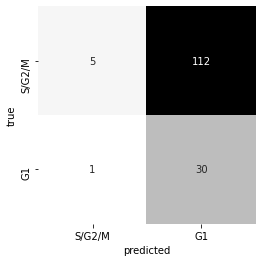

In [25]:
mat = confusion_matrix(df_data.iloc[:,6],ypred)
sns.heatmap(mat,cmap='binary', square= True, annot=True, fmt='d', xticklabels=['S/G2/M','G1'], yticklabels=['S/G2/M','G1'], cbar= False)
plt.xlabel("predicted")
plt.ylabel("true")
plt.show()